# Customer Propensity Modelling - EDA

---

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')


Loading the data from the training sample

In [2]:
rawdata = pd.read_csv("../data/raw/training_sample.csv")


In [3]:
rawdata.columns


Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [4]:
rawdata.drop('UserID', axis=1,inplace=True)


In [5]:
TARGET = 'ordered'


In [6]:
#How many exited?
target_dist = rawdata[TARGET].value_counts()
perc = 100*target_dist/sum(target_dist)
print(f'Customers who did not place an order:  {target_dist[0]} or {perc[0]:.02f}%')
print(f'Customers who placed an order: {target_dist[1]} or {perc[1]:.02f}%')


Customers who did not place an order:  151655 or 100.00%


KeyError: 1

Text(0, 0.5, 'Count')

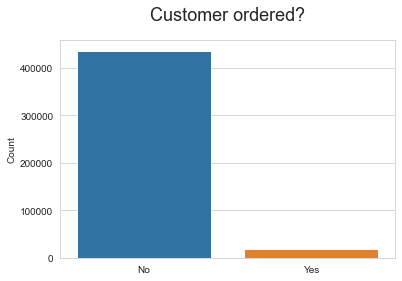

In [7]:
# Visualize the customer churn distribution
ax = sns.barplot(x=target_dist.index, y=target_dist.values)
ax.set_title('Customer ordered?', pad=20, fontsize=18)
ax.set_xticklabels(('No', 'Yes'))
ax.set_ylabel('Count')


Notice that the customers who placed an order are a huge minority. We need to keep this in consideration when we develop our models

<ipython-input-69-c814787eb2ae>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-69-c814787eb2ae>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1,


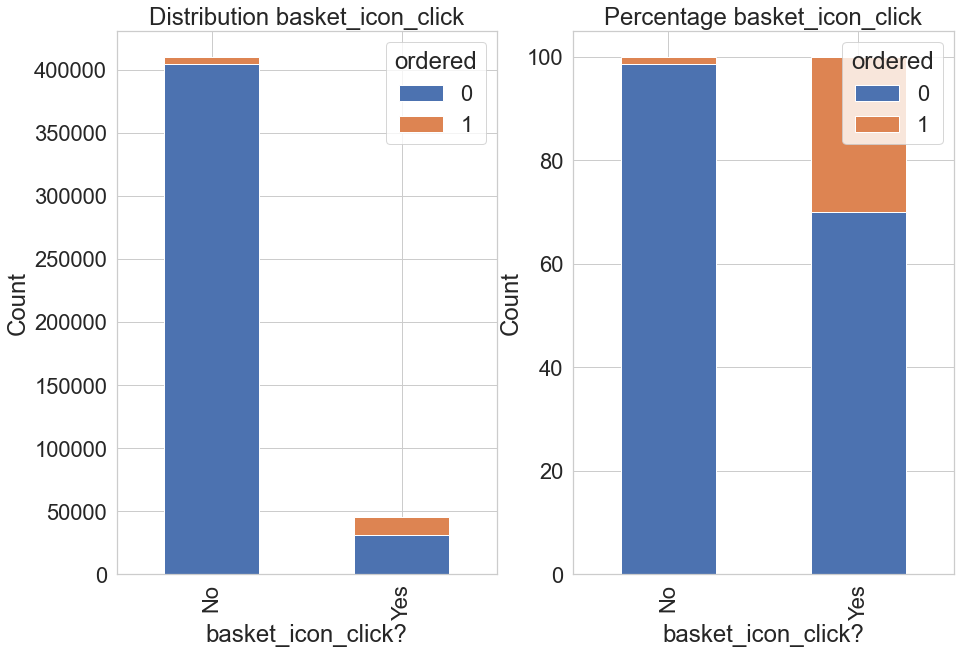

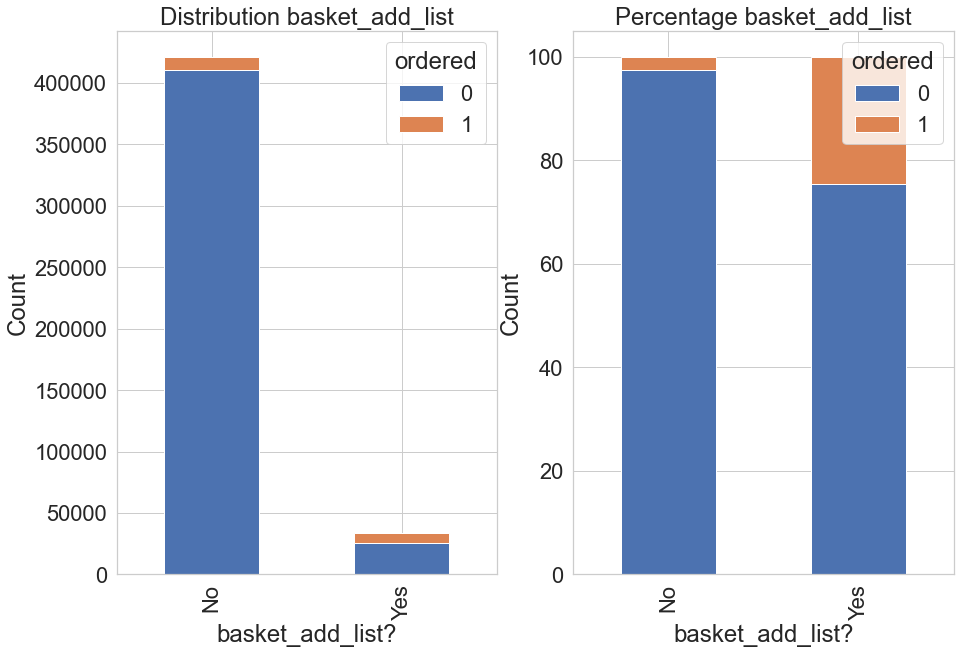

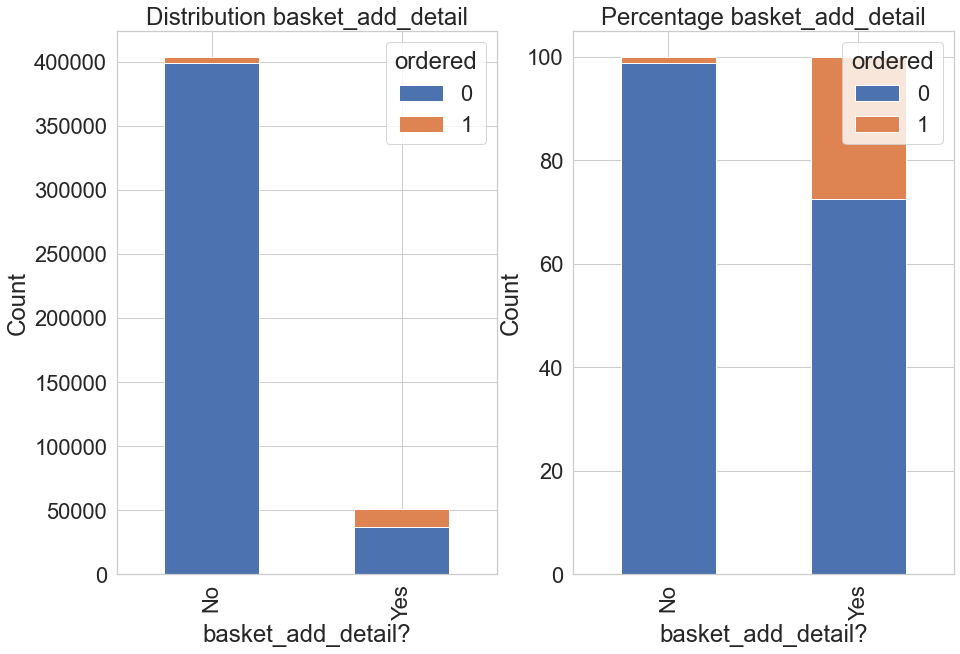

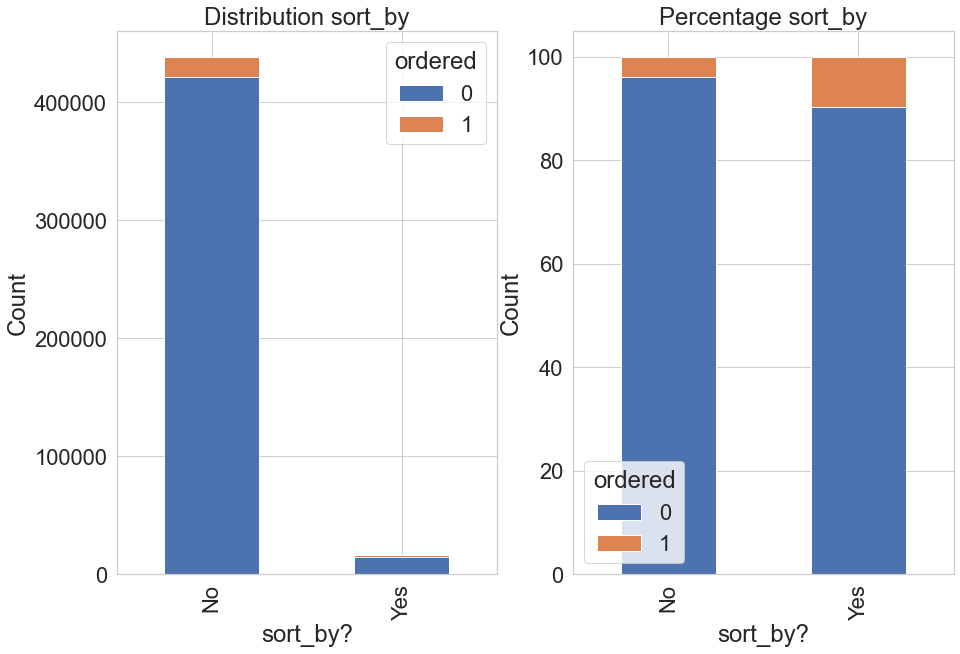

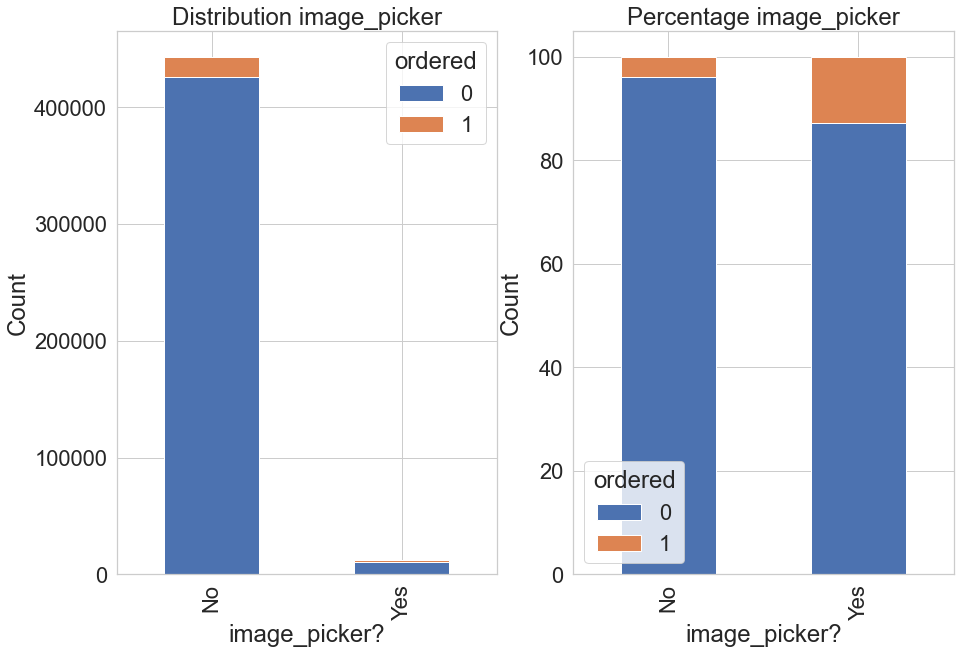

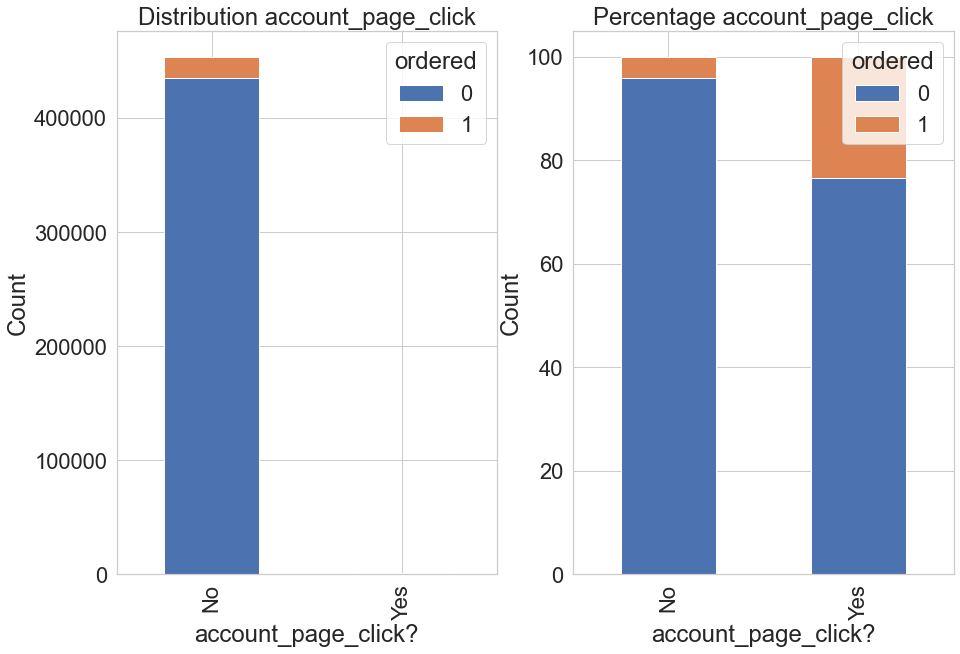

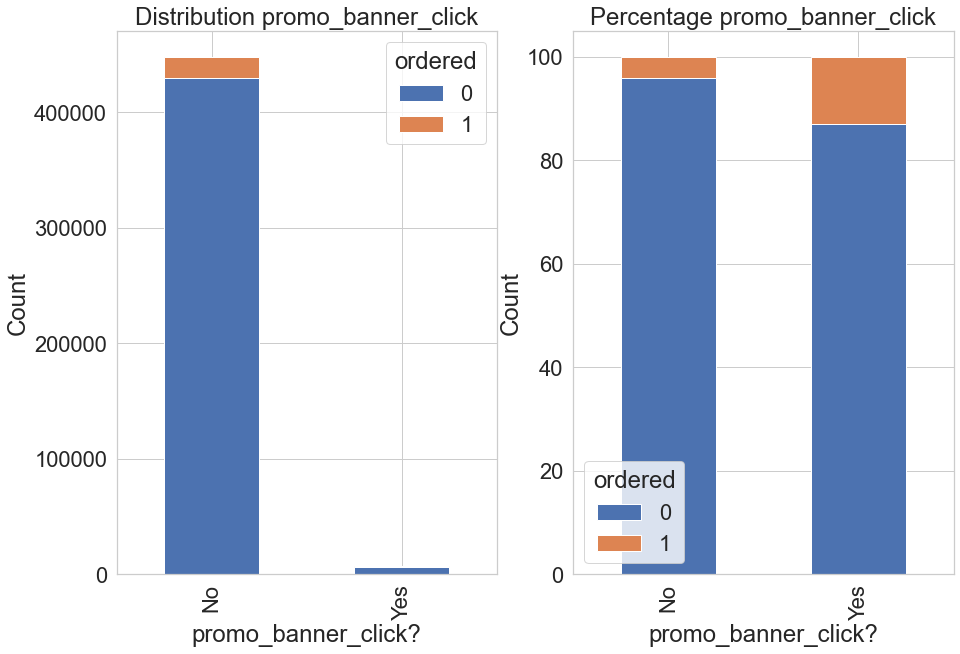

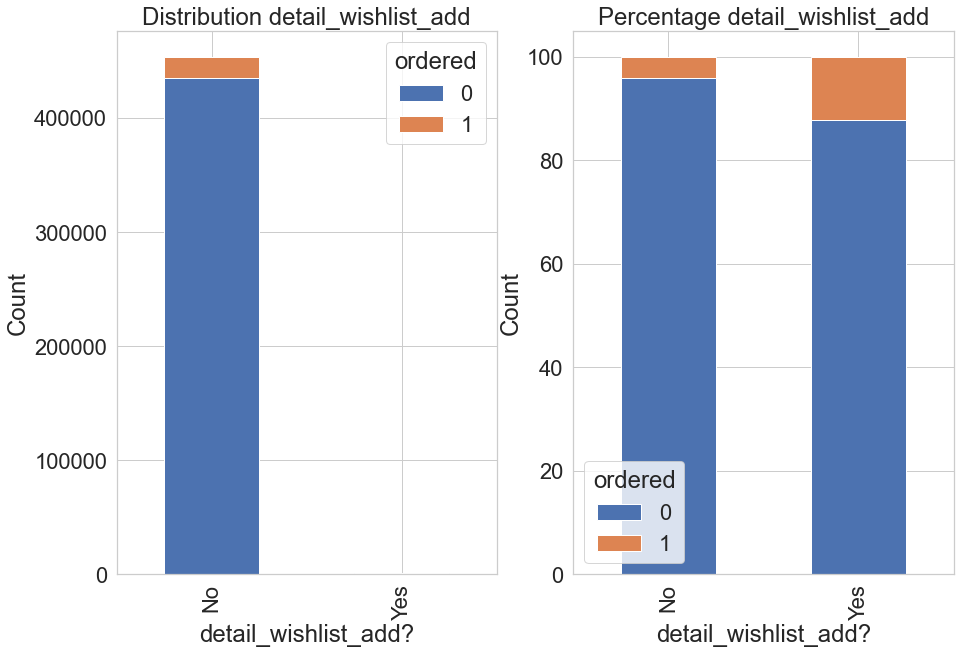

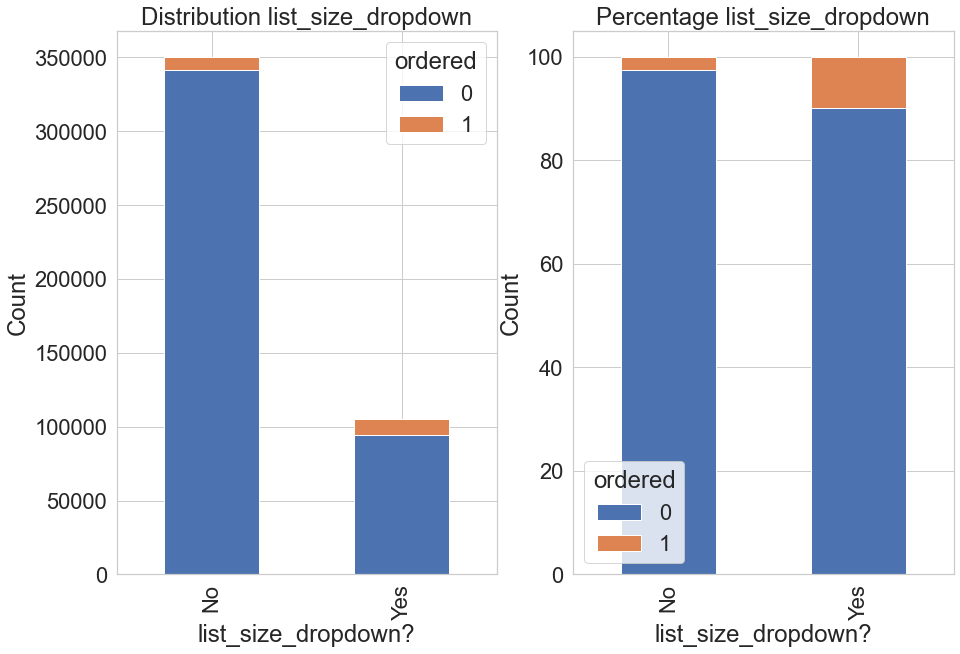

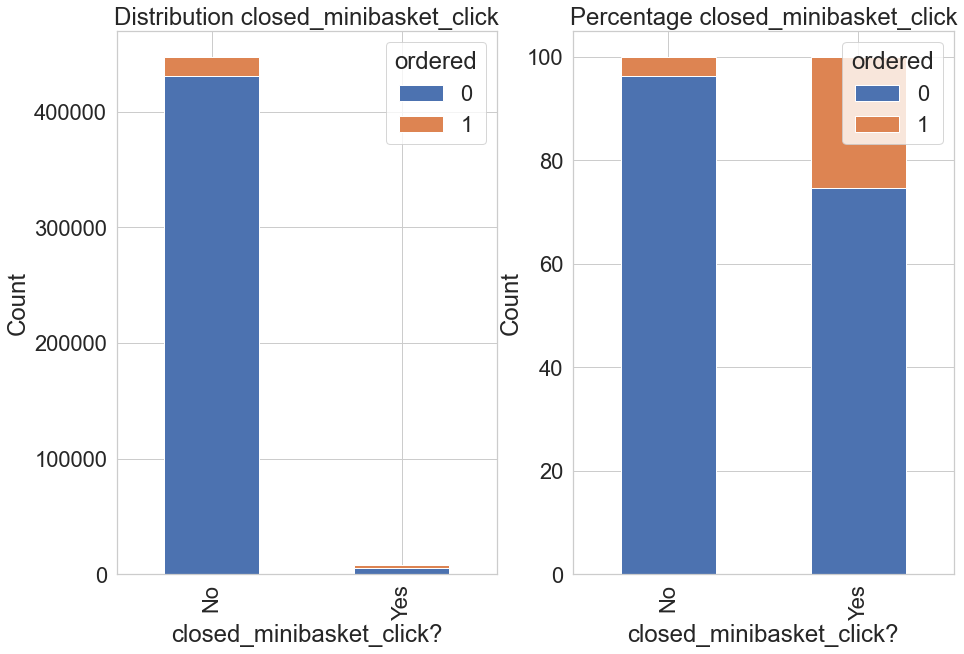

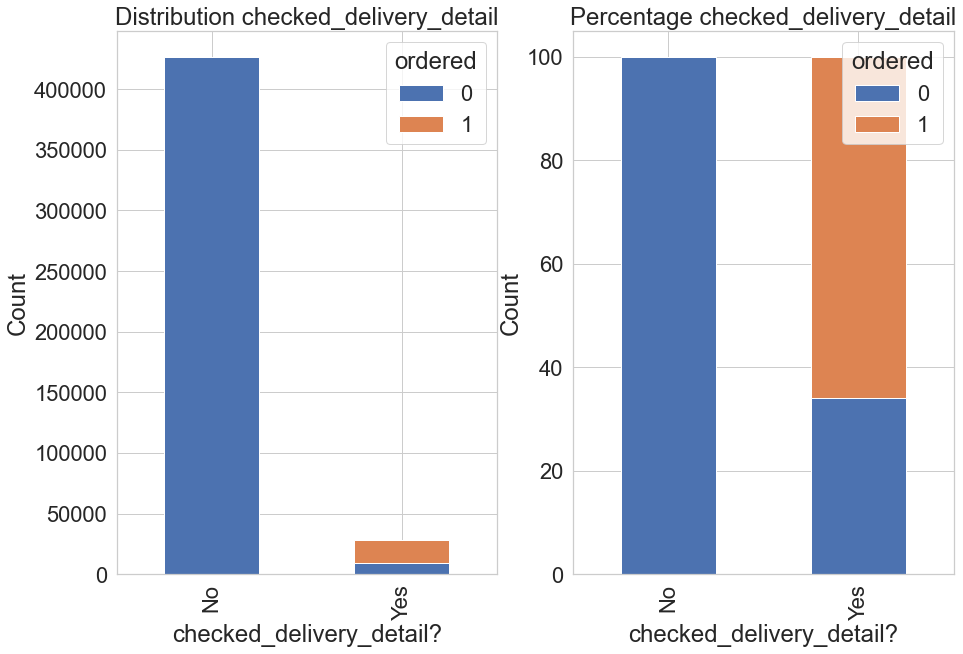

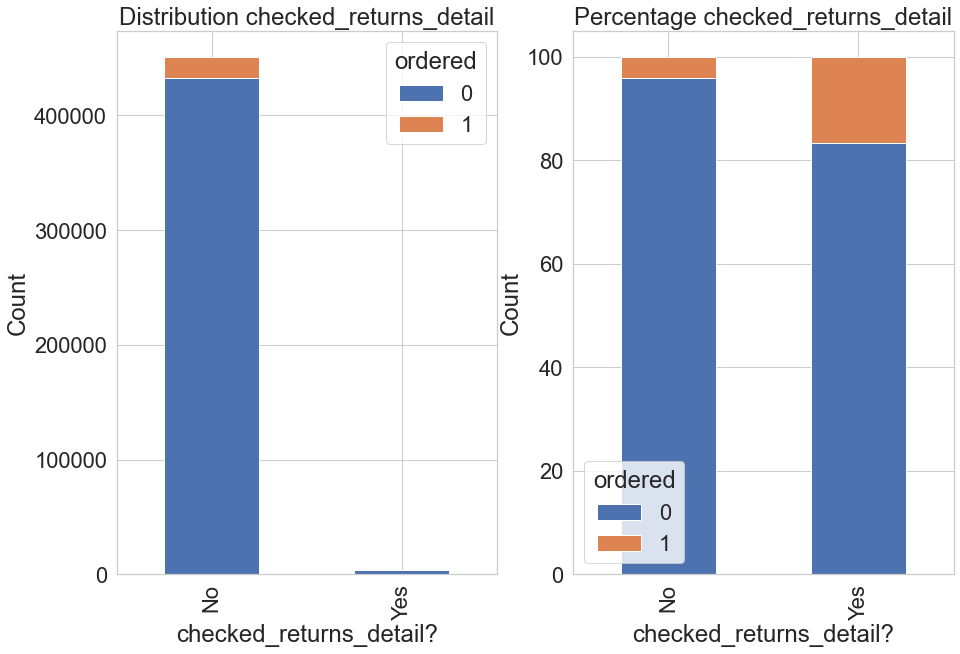

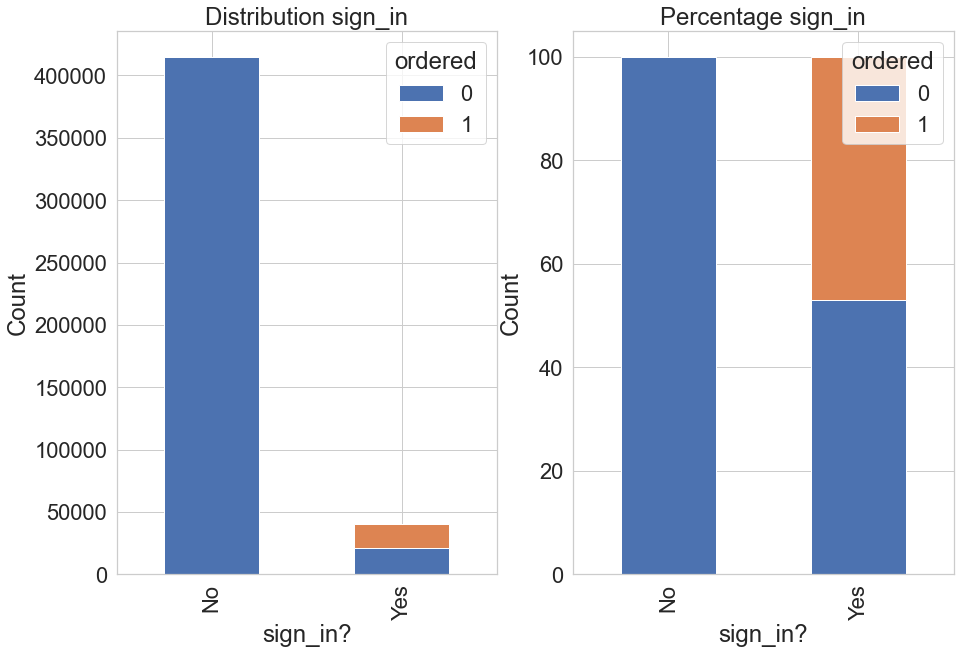

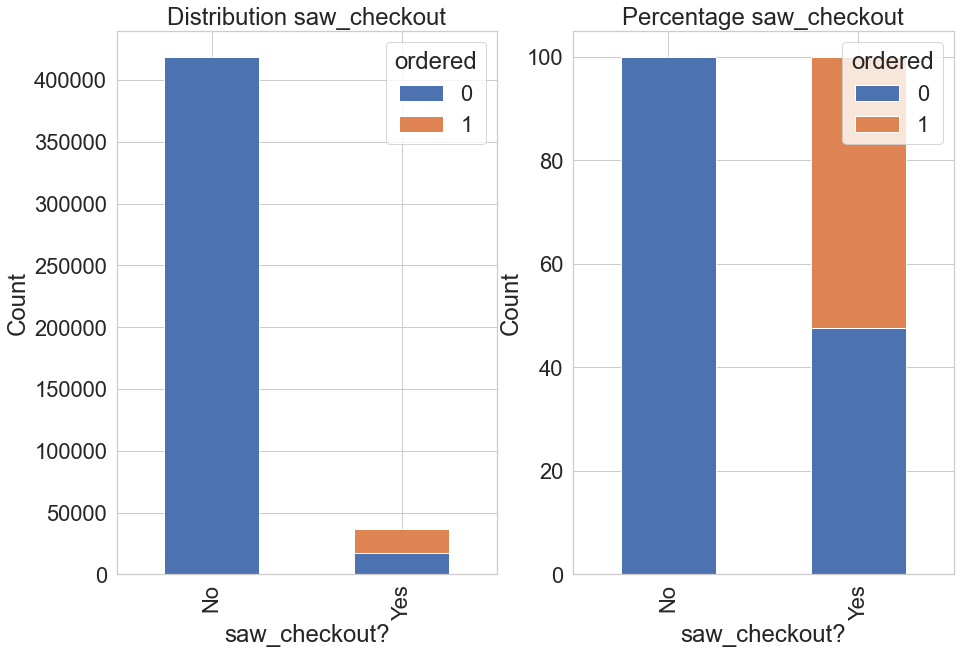

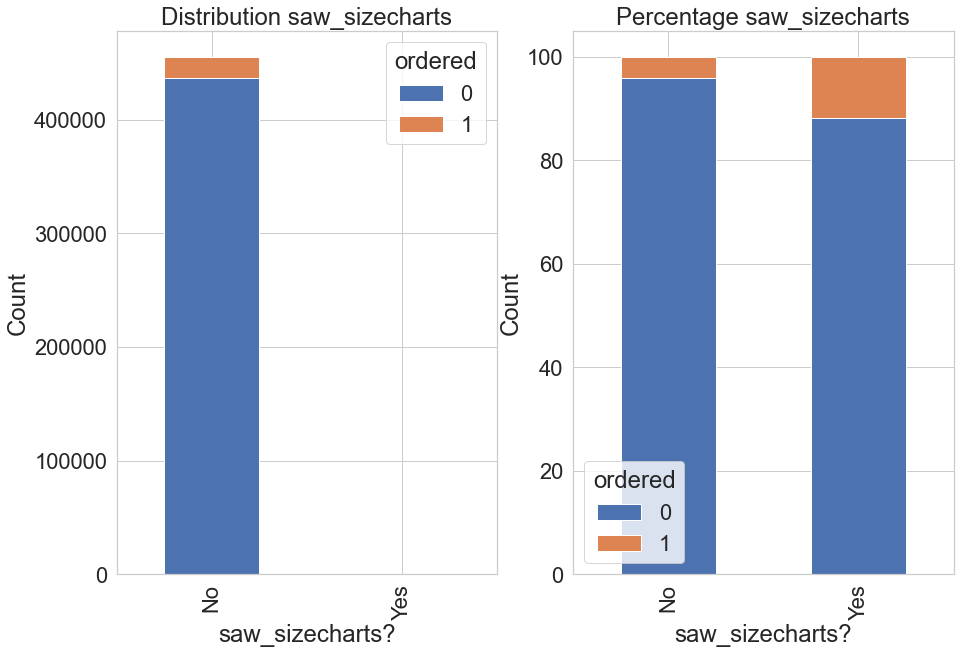

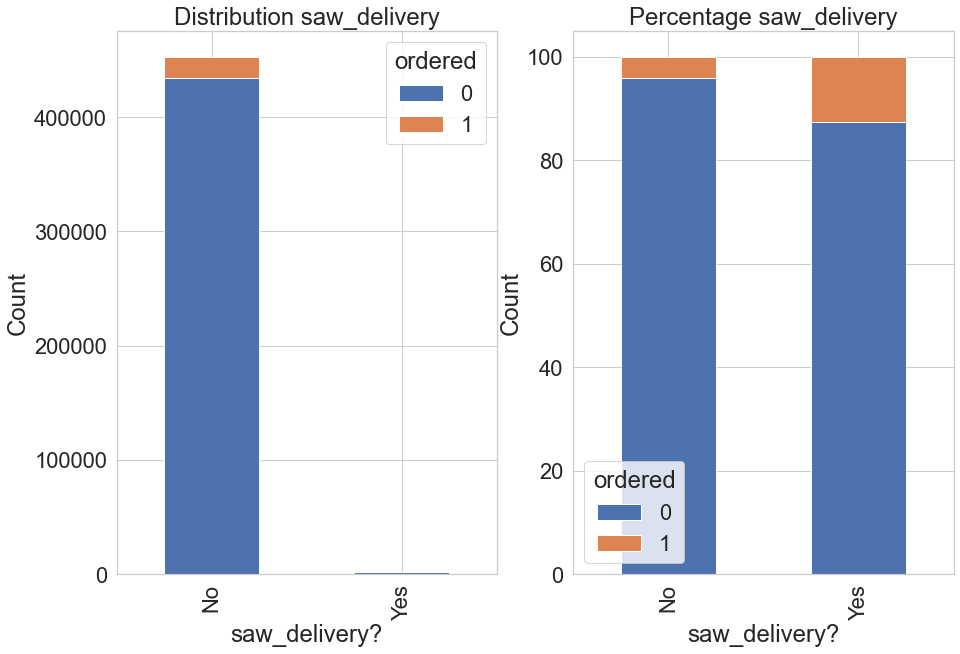

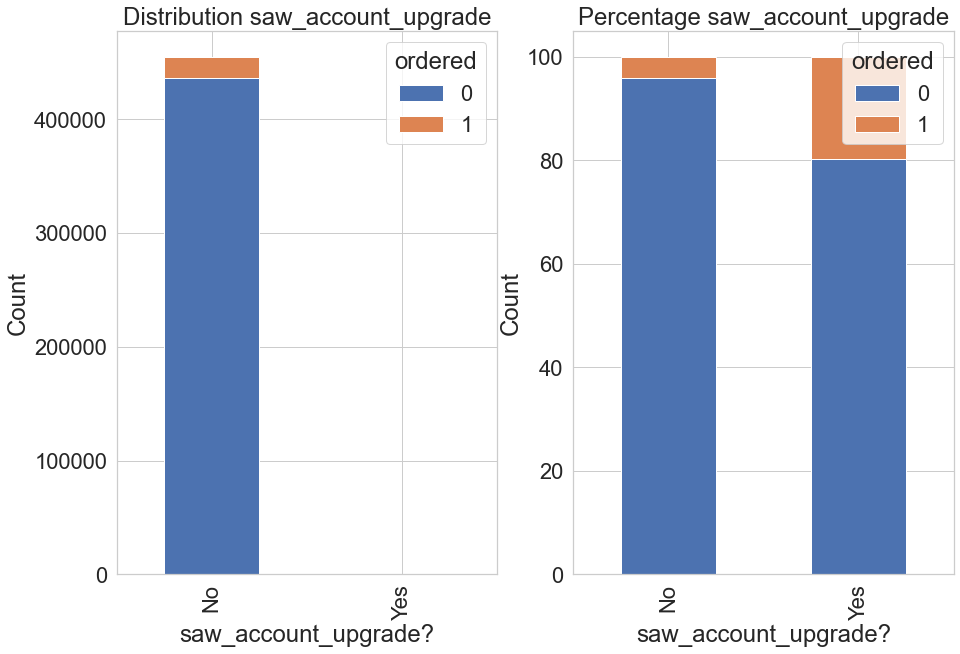

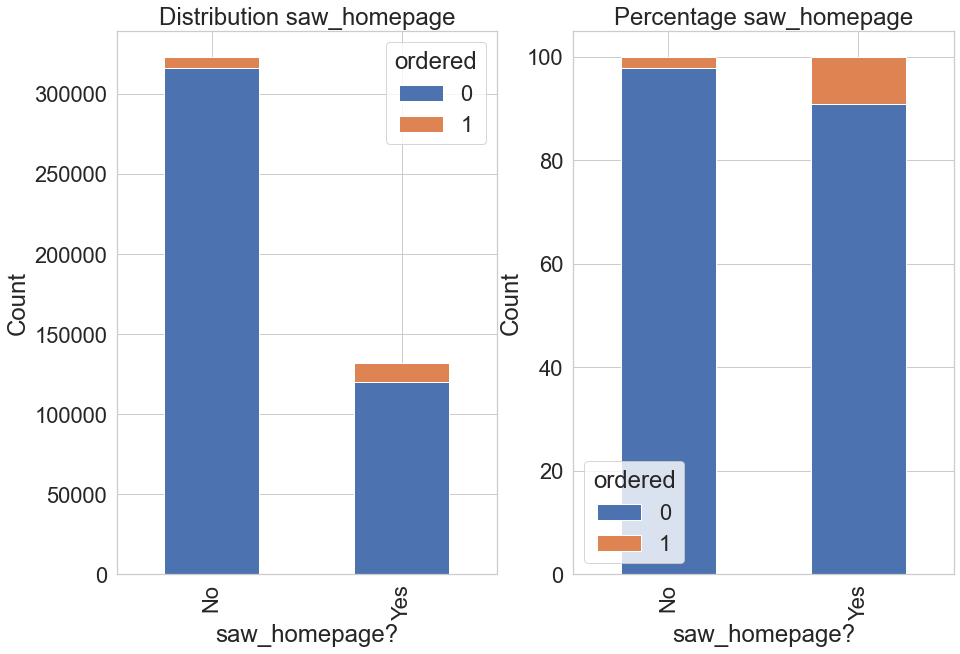

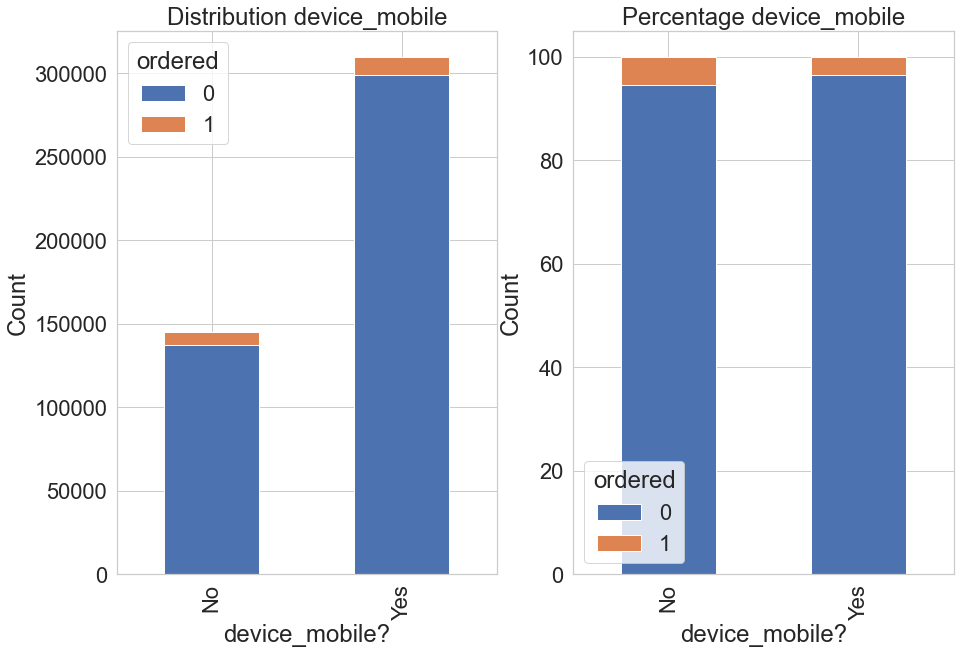

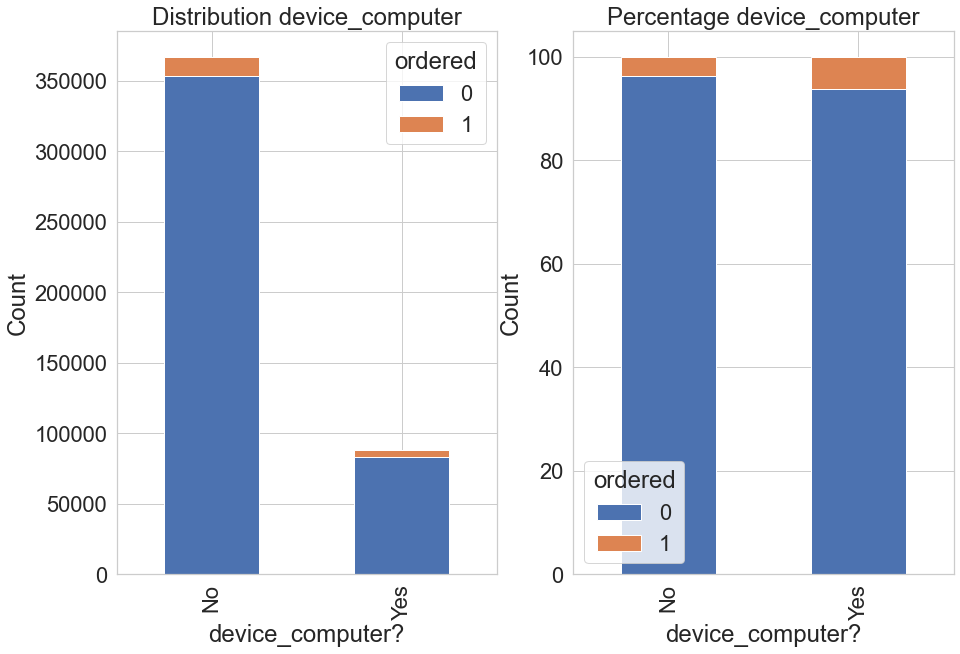

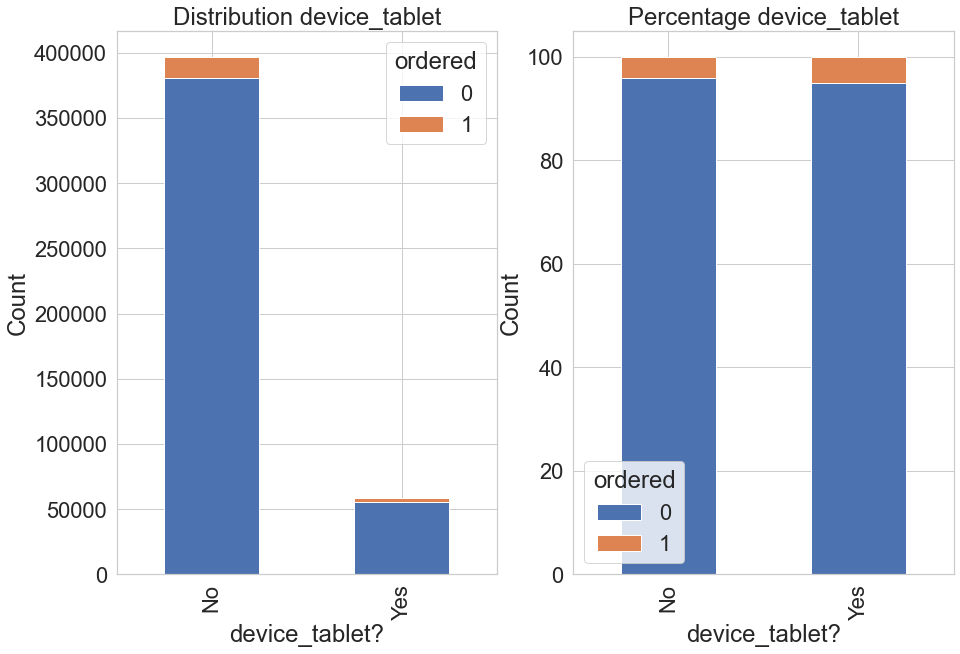

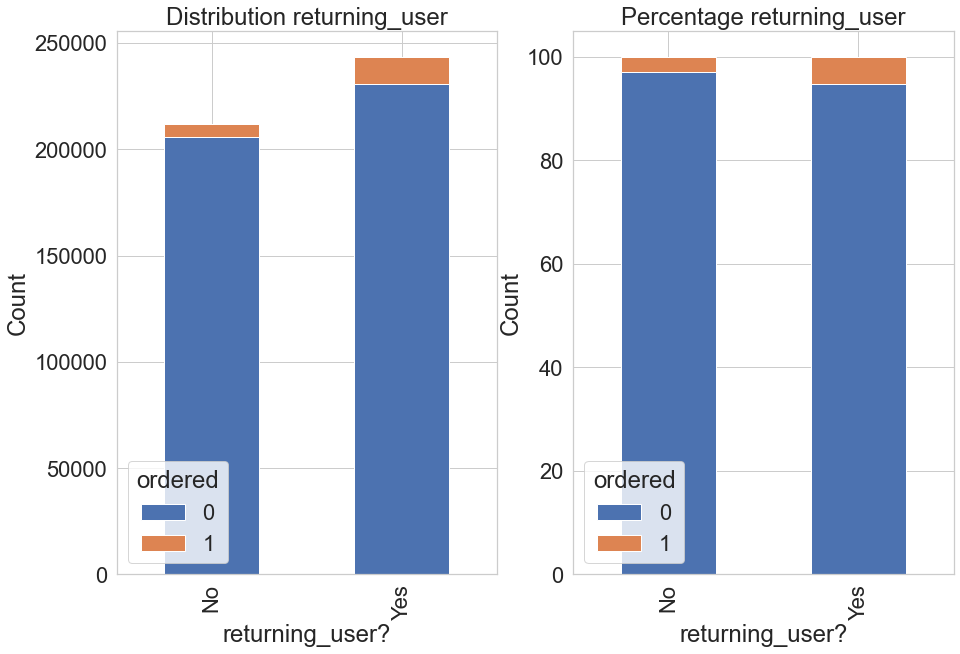

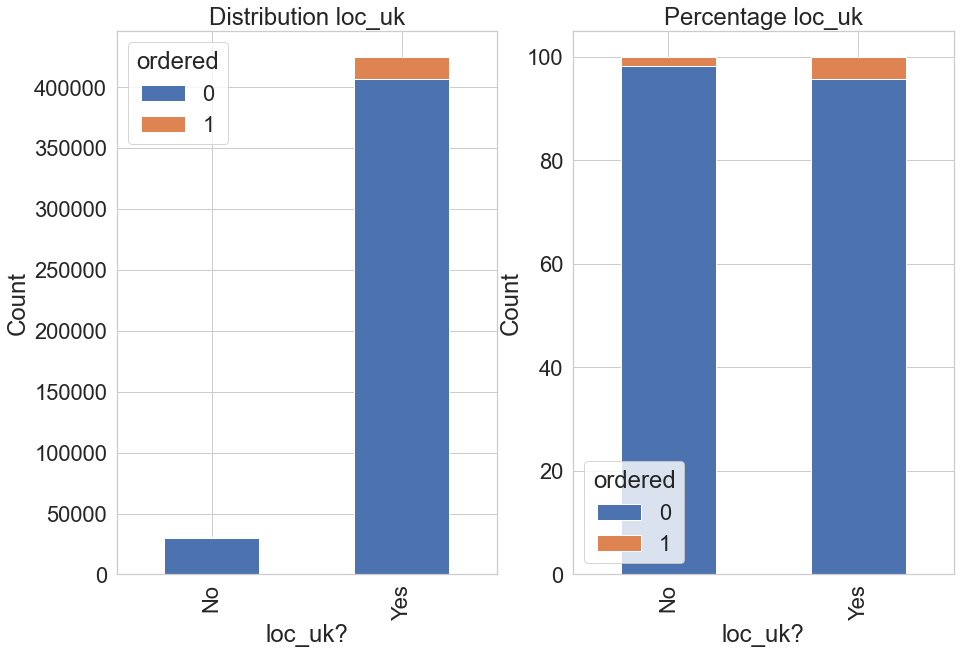

In [69]:
for i, feature in enumerate(rawdata.columns[:-1]):
    fig, ax = plt.subplots(nrows=1,
                           ncols=2, figsize=(15, 10))
    tempdf = rawdata.groupby([feature, TARGET])[TARGET].count().unstack()

    tempdf.plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title(f'Distribution {feature}')
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(f'{feature}?')
    ax[0].set_xticklabels(("No", "Yes"))

    perc = 100*tempdf.div(tempdf.sum(axis="columns"), axis="rows")

    perc.plot(kind='bar', stacked=True, ax=ax[1])
    ax[1].set_title(f'Percentage {feature}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{feature}?')
    ax[1].set_xticklabels(("No", "Yes"))
    fig.show()


In [73]:
(rawdata['device_mobile']+rawdata['device_computer'] + rawdata['device_tablet']).value_counts()


1    453924
2      1456
3        21
dtype: int64

In [74]:
rawdata.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

From a preliminary superficial analsys we see that `checked_delivery_detail`, `sign_in` and `saw_checkout` should be a good indicators for the `ordered`.

Majority of users are mobile users however there is no clear contribution with `ordered`

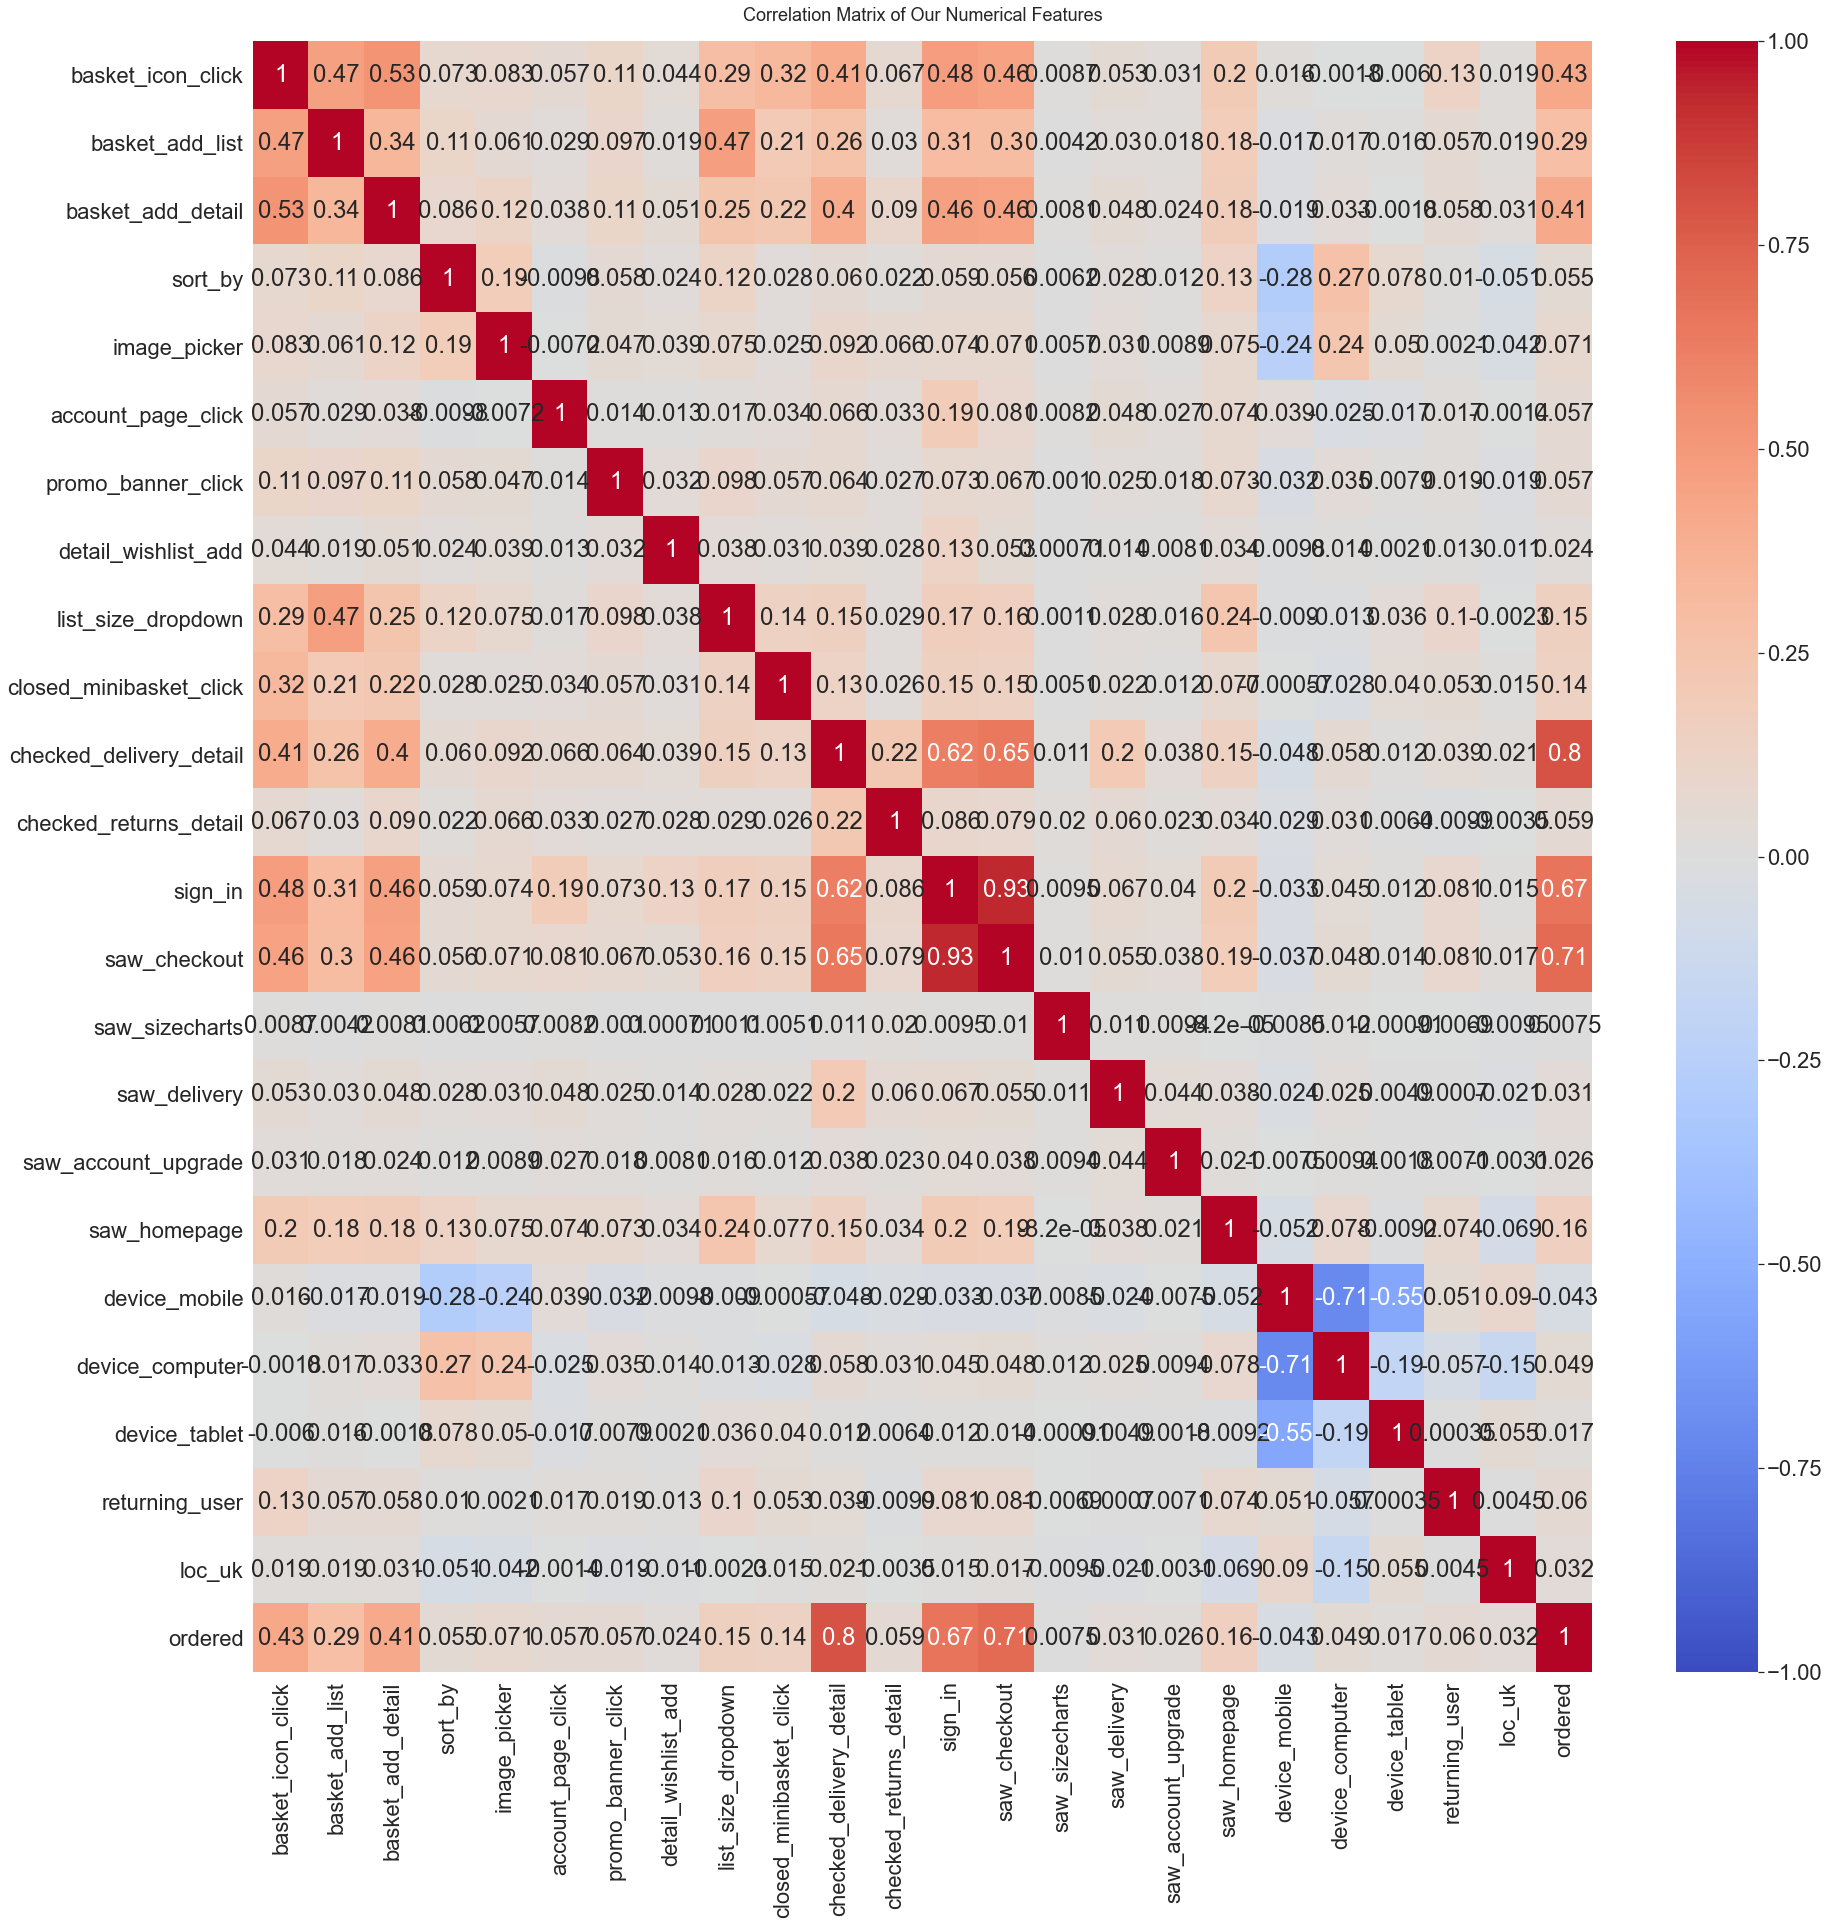

In [79]:
corr = rawdata.corr(method='spearman')
fig, axes = plt.subplots(figsize=(30, 30))
plt.title('Correlation Matrix of Our Numerical Features', pad=20, fontsize=18)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)


Correlation matrix cofirms our initial suspects. However shows also a predictable strong correlation among device types (mutually exclusive). Notice also a huge intercorrelation between `sign_in` and `saw_checkout` which points towards a "lazy user" behaviour (users login anly to checkout). Maybe it is worth removing one of them.

[Text(0, 0.5, 'ordered')]

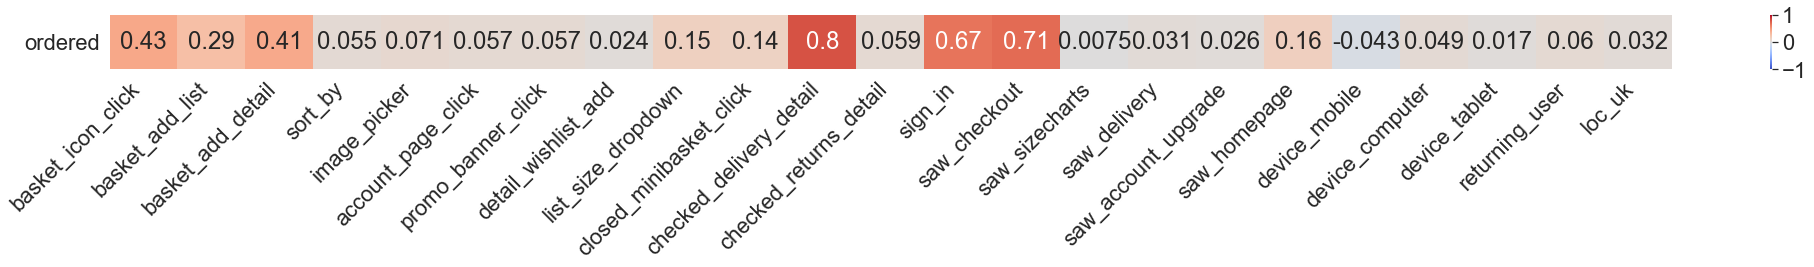

In [82]:
columns = [TARGET]
churn_only = corr.copy()
mask = churn_only.columns.isin(columns)
mask2 = ~churn_only.index.str.startswith('ordered')

churn_only = churn_only.loc[:, mask2]
churn_only = churn_only.loc[mask, :]

fig, ax = plt.subplots(figsize=(35, 1))

ax = sns.heatmap(churn_only, annot=True, vmin=-1,
                 vmax=1, center=0, cmap='coolwarm')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)
